In [1]:
import LandChangeVisualization as LCV
import LandUseChangeAnalyzer as LUCA

<h3> 🌍 Analiza zmian użytkowania terenu na podstawie danych CORINE </h3>
Ten projekt analizuje zmiany w użytkowaniu terenu na przestrzeni lat, wykorzystując dane programu CORINE Land Cover (CLC). To ogólnoeuropejska baza danych, dotycząca pokrycia terenu i użytkowania gruntów na kontynencie europejskim. W obecnej formie CORINE Land Cover zapewnia dane klasyfikacji terenu na 44 różne klasy tematyczne. Pierwszy zbiór danych powstał w 1990 roku, a następnie od roku 2000 jest aktualizowany co sześć lat, z ostatnią aktualizacją w 2018 roku.

<h3> 📊 Poziomy szczegółowości danych CORINE </h3>

<h4> Level 1 – Poziom ogólny </h4>
5 głównych kategorii:
<ul>

🏙️ 1 - Sztuczne powierzchnie

🌾 2 - Użytki rolne

🌲 3 - Lasy i tereny półnaturalne

🐸 4 - Obszary podmokłe

🌊 5 - Ciała wodne

❓ 0 - Brak danych
</ul>

<h4> Level 2 – Poziom średni </h4> 
Rozbicie każdej głównej kategorii na bardziej szczegółowe typy użytkowania.
<ul>

🏗️ Sztuczne powierzchnie
<ul>

🏘️ 11 - Zabudowa miejska

🏭 12 - Obiekty przemysłowe, handlowe i transportowe

⛏️ 13 - Tereny górnicze, hałdy i place budowy

🌳 14 - Sztuczna roślinność nie-rolnicza
</ul>
🚜 Użytki rolne
<ul>

🌱 21 - Grunty orne

🍇 22 - Uprawy trwałe

🐄 23 - Użytki zielone

🚜 24 - Złożone obszary rolnicze
</ul>
🌳 Lasy i półnaturalna roślinność
<ul>

🌳 31 - Lasy (128, 255, 0)

🌿 32 - Zarośla i roślinność trawiasta

⛰️ 33 - Tereny odkryte z małą lub żadną roślinnością
</ul>
🐸 Obszary podmokłe
<ul>

🐸 41 - Śródlądowe obszary podmokłe

🌊 42 - Nadmorskie obszary podmokłe
</ul>
💧 Ciała wodne
<ul>

🏞️ 51 - Wody śródlądowe

🌅 52 - Wody morskie
</ul>
❓ 00 - Brak danych
</ul>
<h4> Level 3 – Poziom szczegółowy </h4>
Najbardziej szczegółowy poziom – 44 klasy. 
<br><br>
Każda klasa ma przypisany unikalny kolor (RGB), co pozwala na wizualne przedstawienie i analizę danych.

In [2]:
LUCA.print_available_bounding_boxes()

EUROPA_OBSZARY_BBOX
Berlin
Paryż
Rzym
Amsterdam
Barcelona
Praga
Wiedeń
Oslo
Madryt
Lizbona
Kopenhaga
Bruksela

POLSKA_OBSZARY_BBOX
Warszawa
Gdańsk
Wrocław
Poznań
Rzeszów
Lublin
Szczecin
Katowice
Białystok
Łódź


In [3]:
Bialystok = LUCA.AreaManager("Białystok")
Bialystok.prepare_analytical_data()

In [4]:
Warszawa = LUCA.AreaManager("Warszawa")
Warszawa.prepare_analytical_data()

In [5]:
Gdańsk = LUCA.AreaManager("Gdańsk")
Gdańsk.prepare_analytical_data()

In [6]:
Rzeszow = LUCA.AreaManager("Rzeszów")
Rzeszow.prepare_analytical_data()

In [7]:
Praga = LUCA.AreaManager("Praga")
Praga.prepare_analytical_data()

In [8]:
Barcelona = LUCA.AreaManager("Barcelona")
Barcelona.prepare_analytical_data()

In [9]:
Rzym = LUCA.AreaManager("Rzym")
Rzym.prepare_analytical_data()

In [10]:
Berlin = LUCA.AreaManager("Berlin")
Berlin.prepare_analytical_data()

In [11]:
city_objects = {
    "Warszawa": Warszawa,
    "Gdańsk": Gdańsk,
    "Białystok": Bialystok,
    "Rzeszów":Rzeszow,
    "Barcelona": Barcelona,
    "Rzym": Rzym,
    "Berlin": Berlin,
    "Praga": Praga
}


<h2> FAZA 1 - Przegląd ogólny (europejski) </h2>

<h4> 🗺️ Mapa obszarów transformacji użytkowania terenu </h4>
Poniższa mapa przedstawia obszary analizy wybranych regionów. Każdy z analizowanych fragmentów został zaznaczony prostokątem na mapie. Wewnątrz tych obszarów zaznaczono piksele, które uległy transformacjom użytkowania terenu – czyli zmianom klasy terenu między kolejnymi okresami czasowymi.

<h4>🧠 Definicja transformacji </h4>
Transformacja oznacza zmianę typu użytkowania terenu pomiędzy dwoma kolejnymi momentami pomiaru. W analizie uwzględniono cztery okresy transformacji:

1990 → 2000
2000 → 2006
2006 → 2012
2012 → 2018

<h4>🎨 Kolorystyka mapy zmian </h4>
<ul>

🔵 Niebieski — obszary, które przeszły 1 transformacje

🔴 Czerwony — obszary, które przeszły 2 transformacje

🟠 Pomarańczowy - obszary, które przeszły 3 transformacje

🟢 Zielony — obszary, które przeszły 4 transformacje
</ul>

<b> 🌍 Uwagi ogólne</b>  <br>
Prezentowana wizualizacja umożliwia szybkie zlokalizowanie terenów, które uległy intensywnym zmianom w czasie. Dynamiczne zmiany mogą wynikać z procesów urbanizacji, zmian gospodarczych, czy też działań inwestycyjnych. Tego typu wizualizacja wspiera analizę trendów przestrzennych i umożliwia podejmowanie decyzji w kontekście planowania przestrzennego.



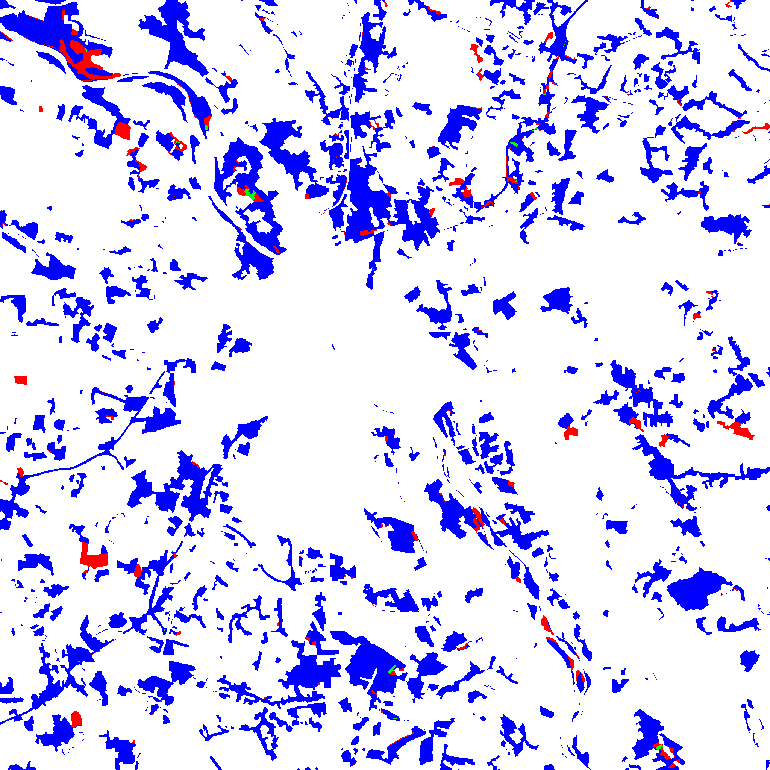
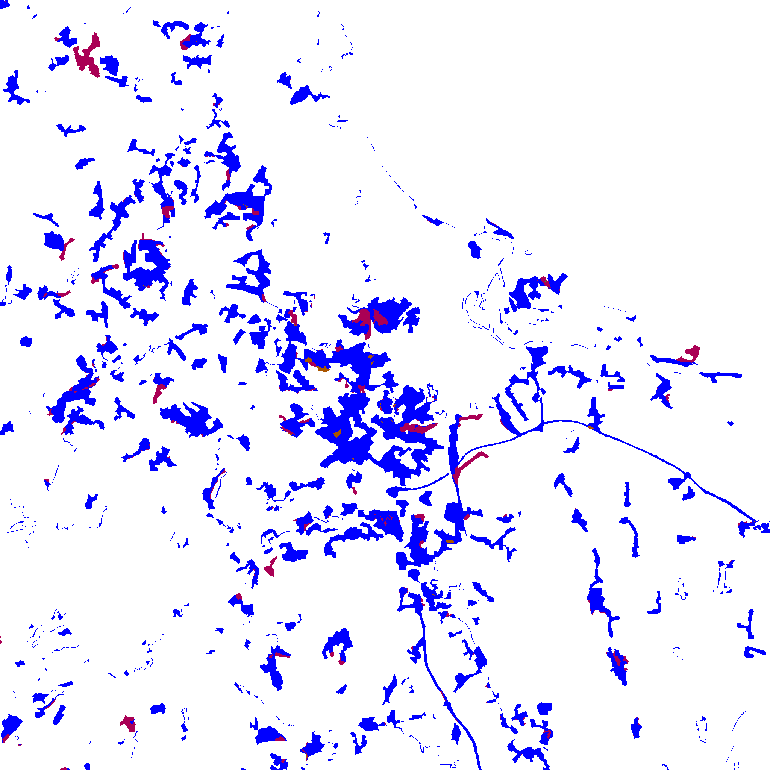
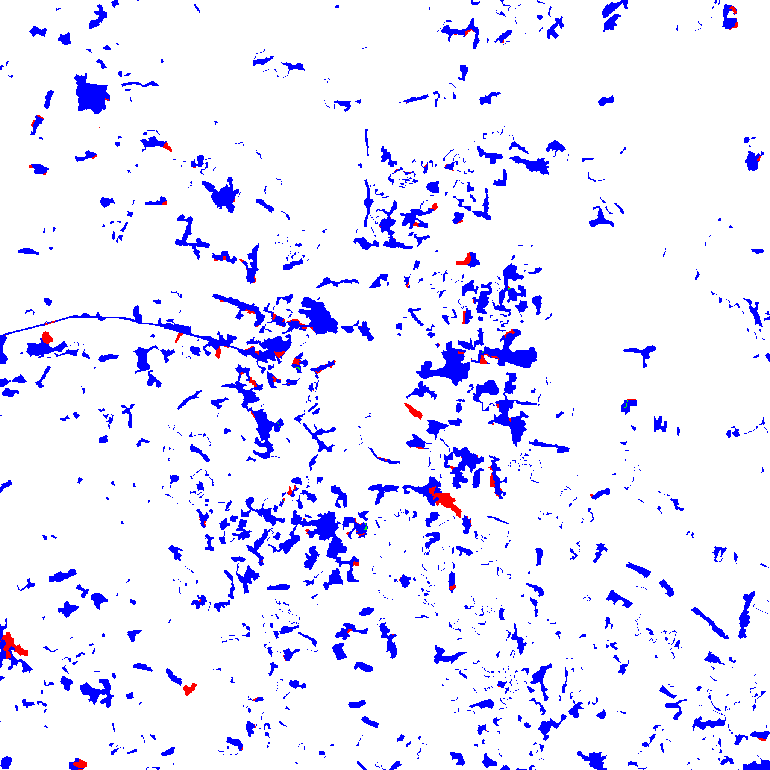
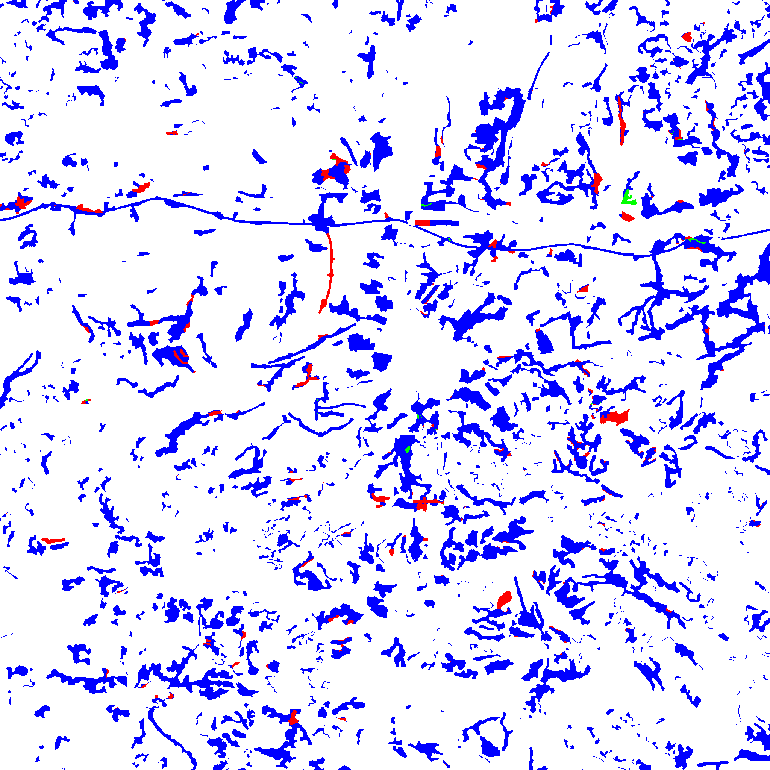
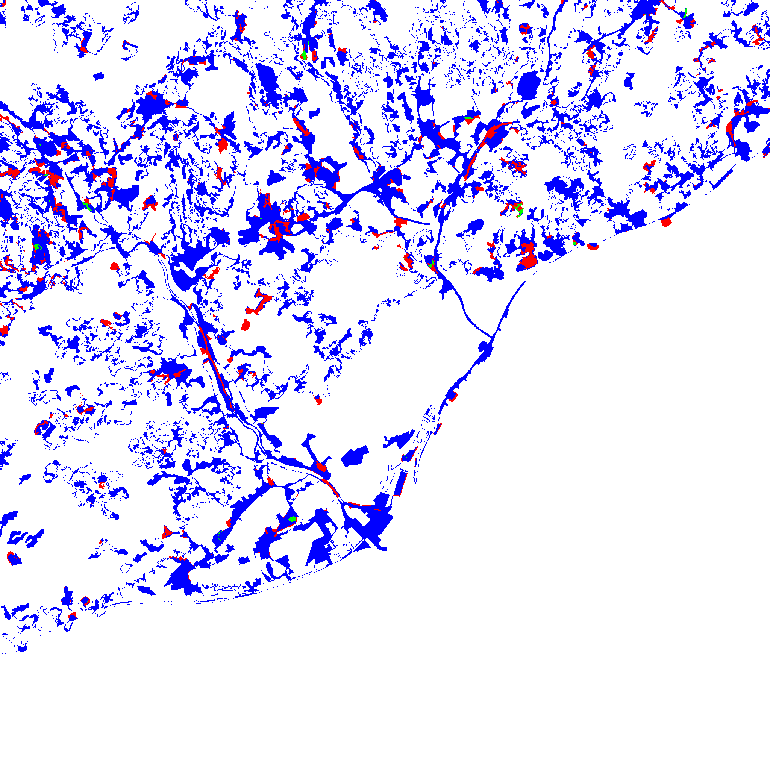
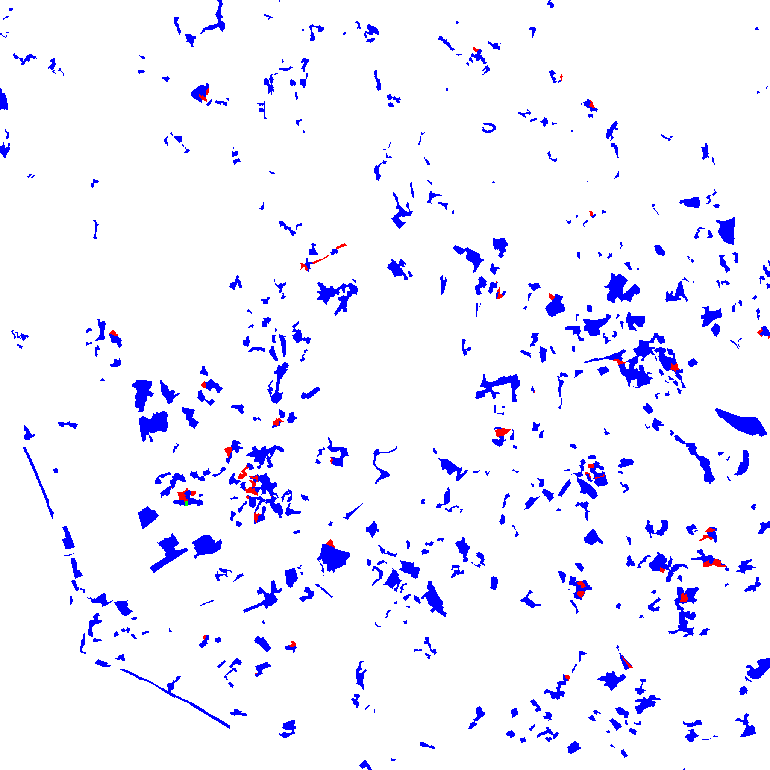
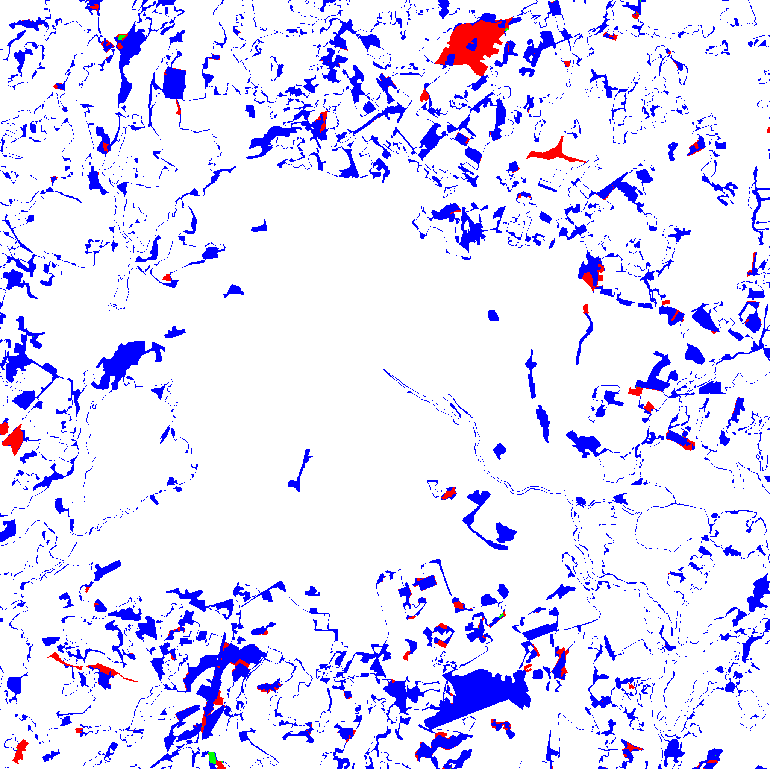
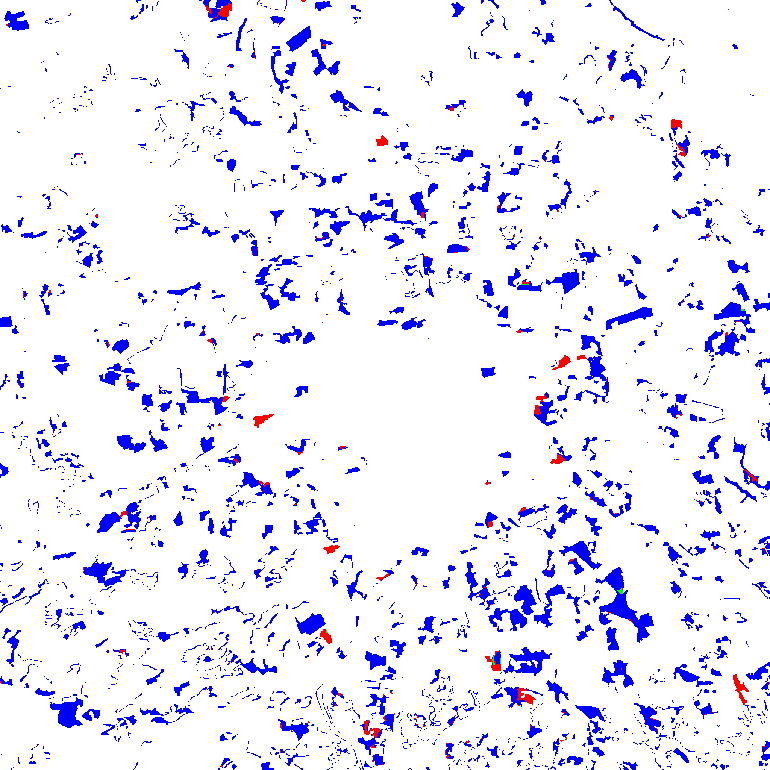

In [12]:
m = LCV.plot_cities_land_use_change_map(
    city_names=list(city_objects.keys()),
    city_objects=city_objects,
    bbox_source={**LUCA.POLSKA_OBSZARY_BBOX,**LUCA.EUROPA_OBSZARY_BBOX},
    years=[1990, 2000, 2006, 2012, 2018],
    class_column="class_lvl_1",
    min_changes=1,
    cmap_name="brg"
)
m


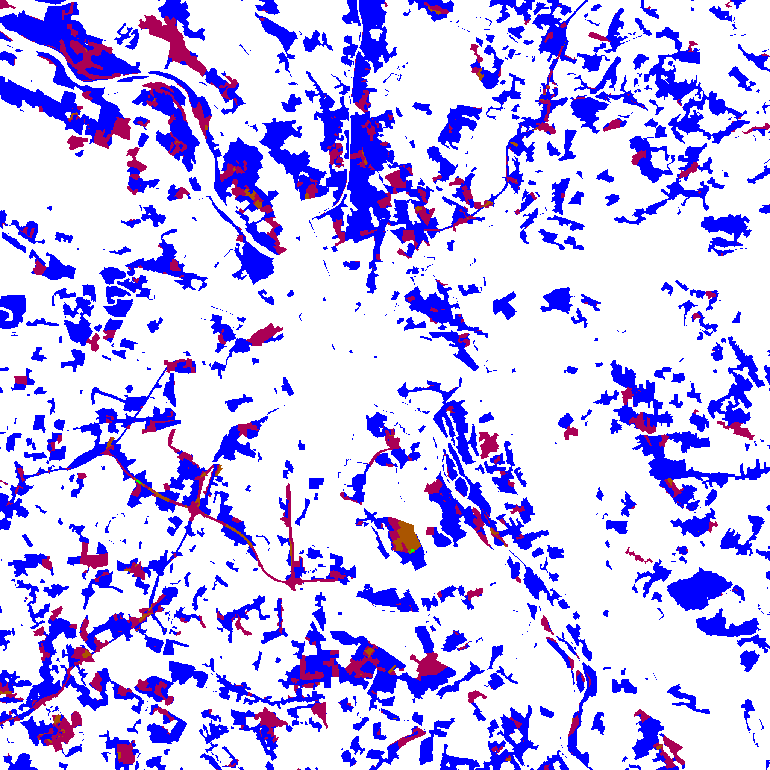
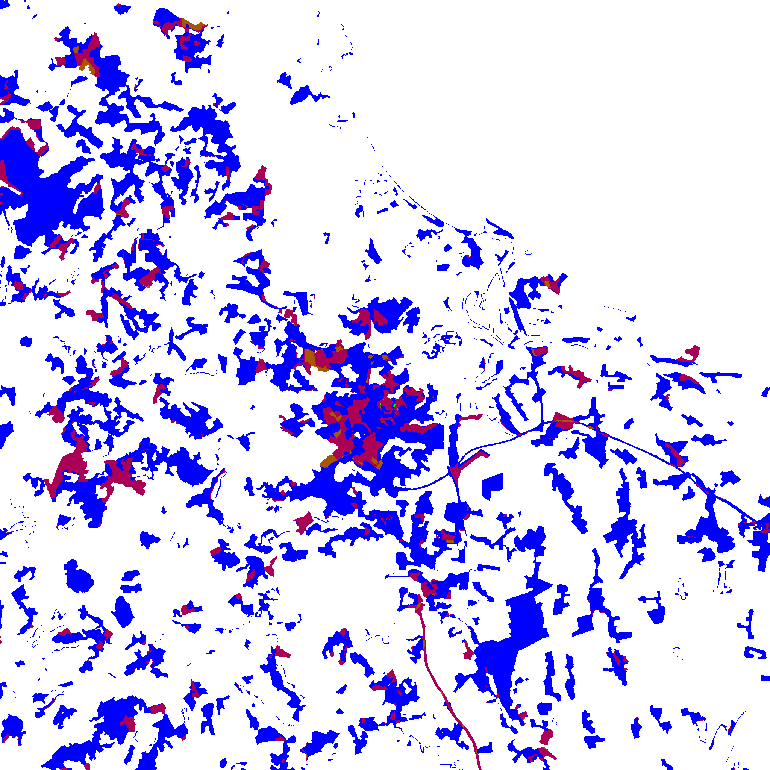
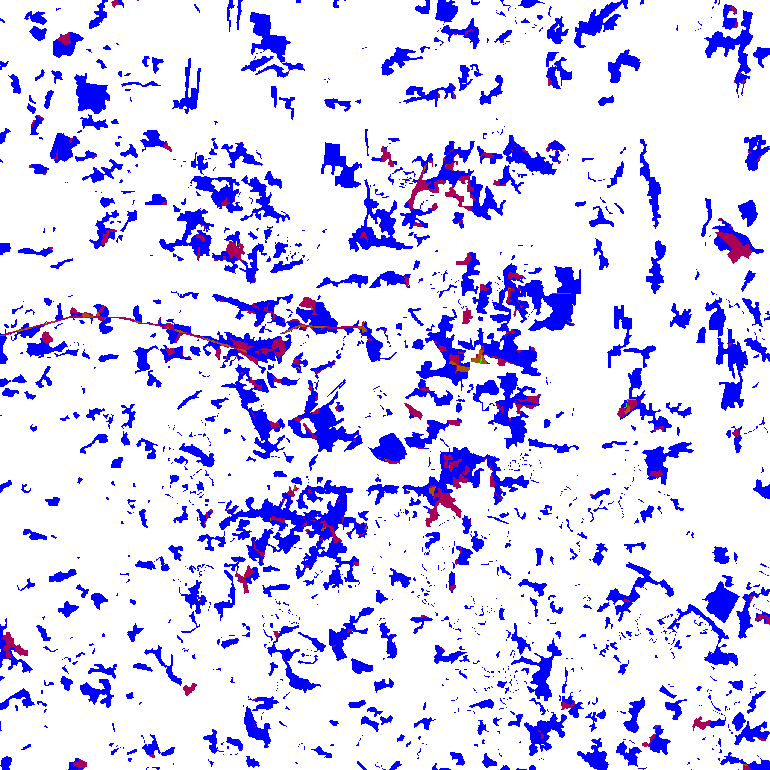
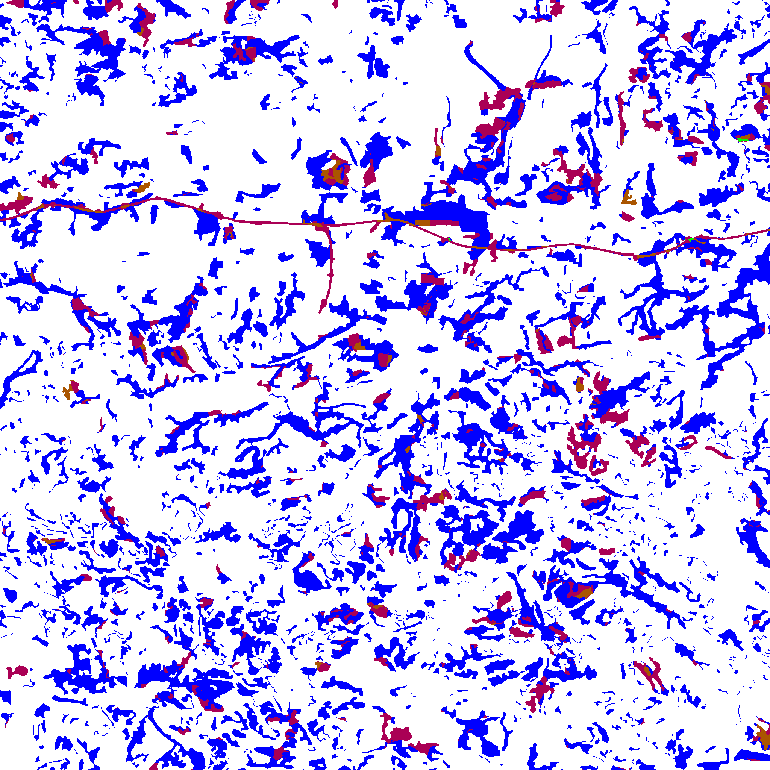
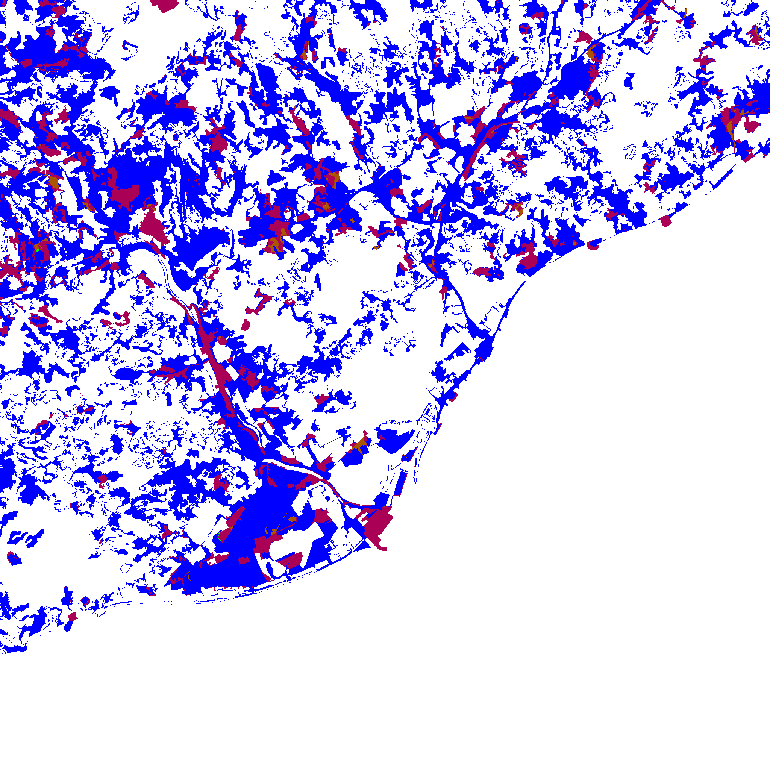
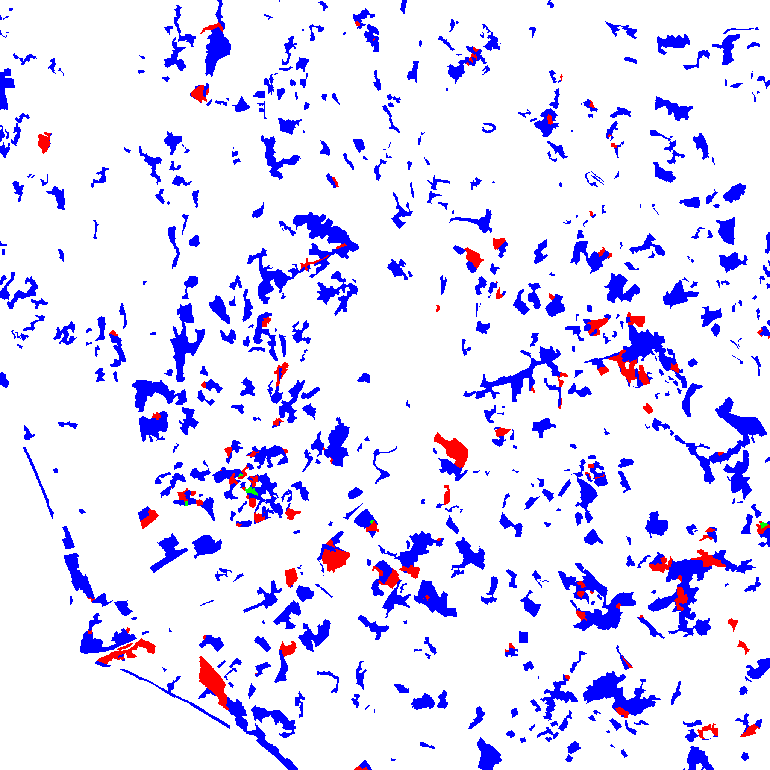
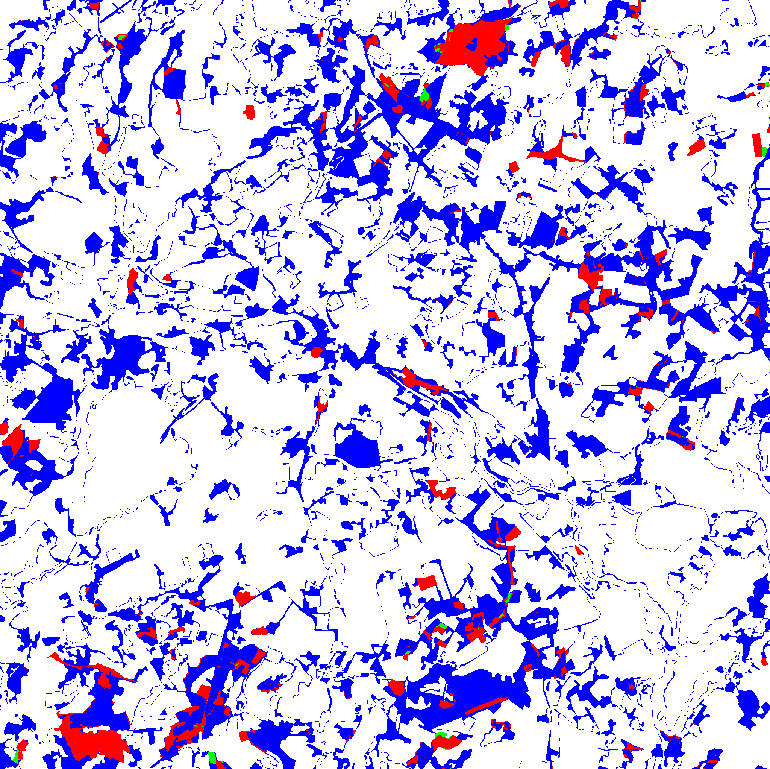
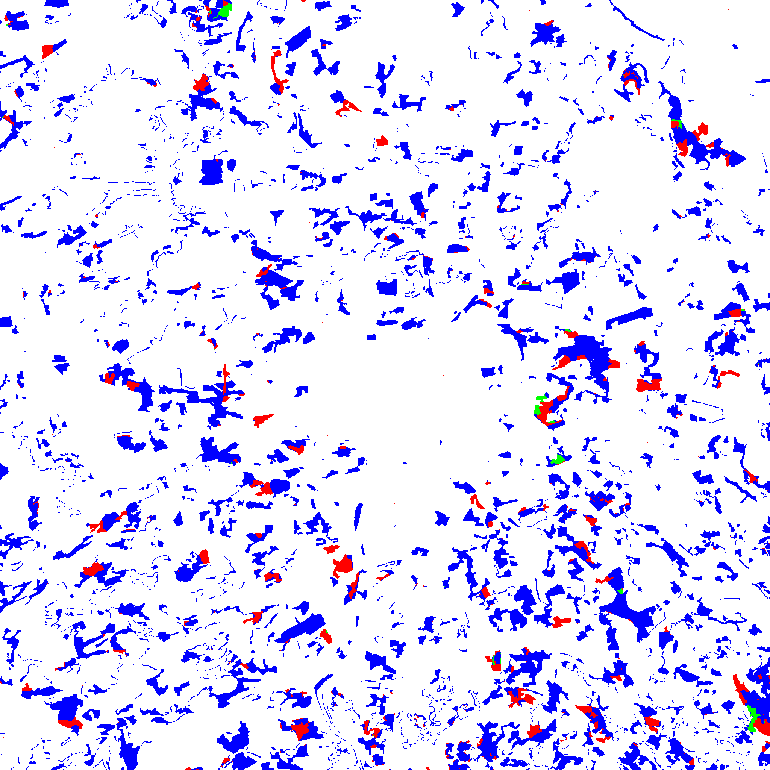

In [13]:
m = LCV.plot_cities_land_use_change_map(
    city_names=list(city_objects.keys()),
    city_objects=city_objects,
    bbox_source={**LUCA.POLSKA_OBSZARY_BBOX,**LUCA.EUROPA_OBSZARY_BBOX},
    years=[1990, 2000, 2006, 2012, 2018],
    class_column="class_lvl_2",
    min_changes=1,
    cmap_name="brg"
)
m


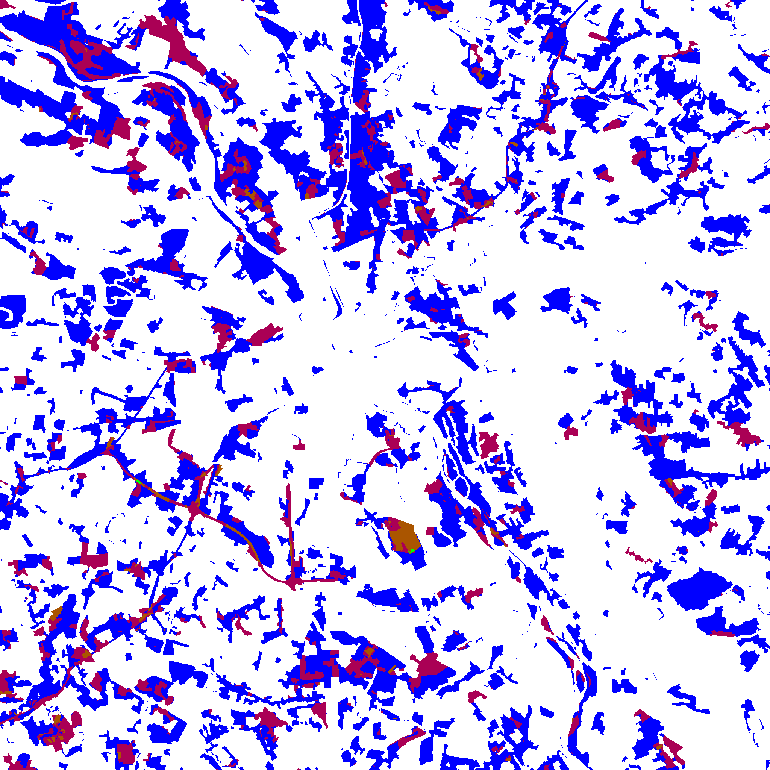
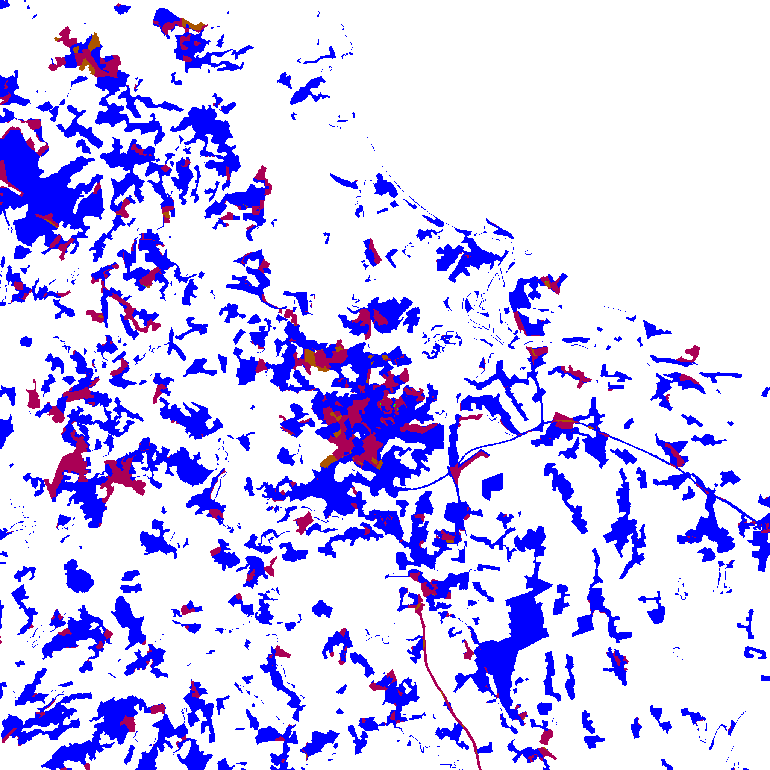
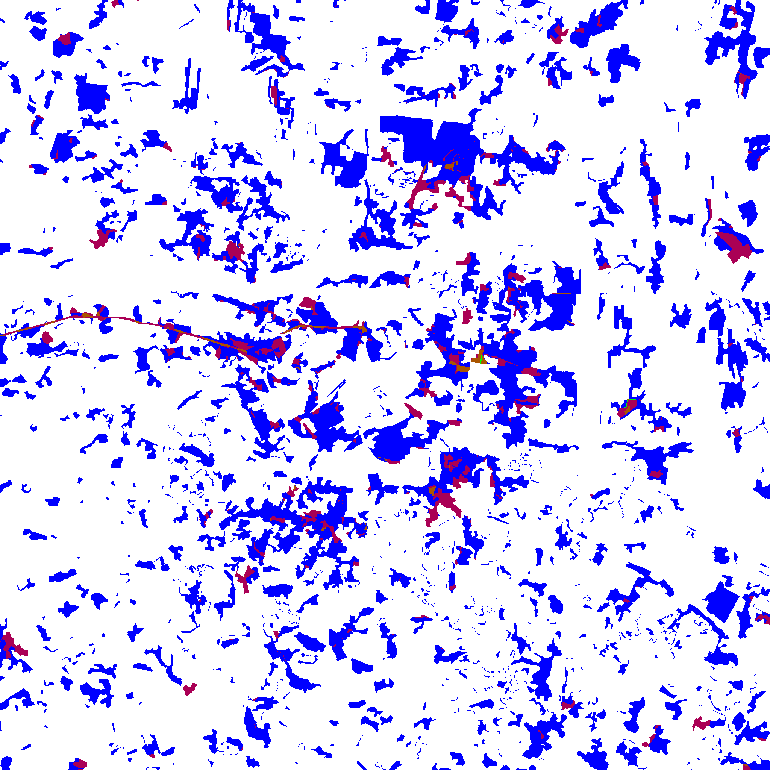
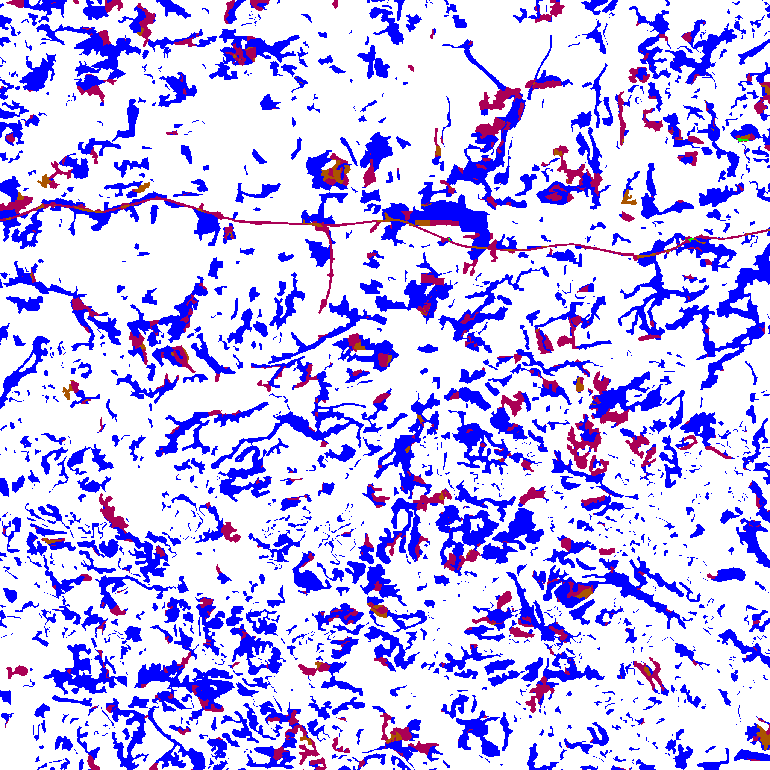
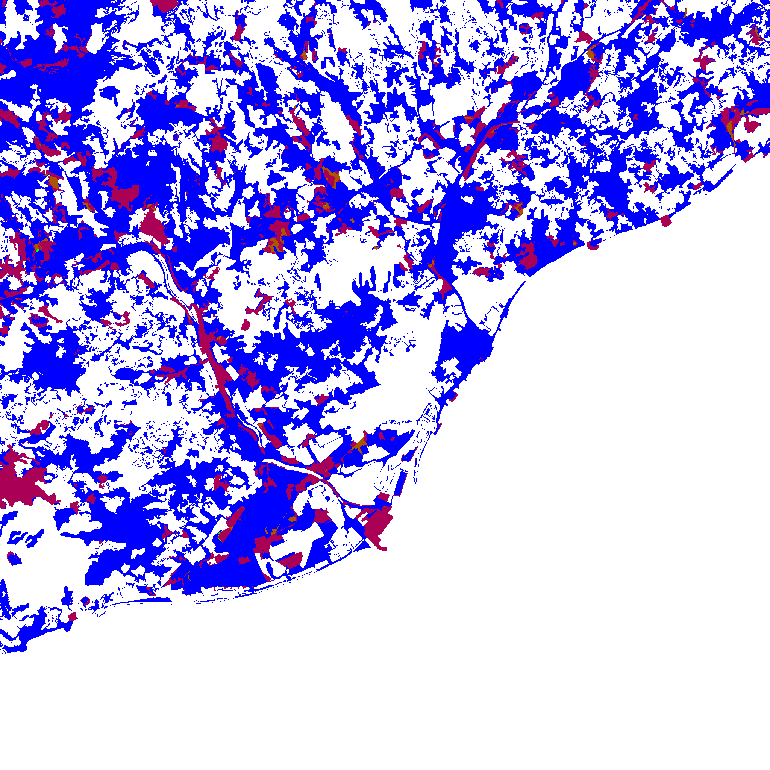
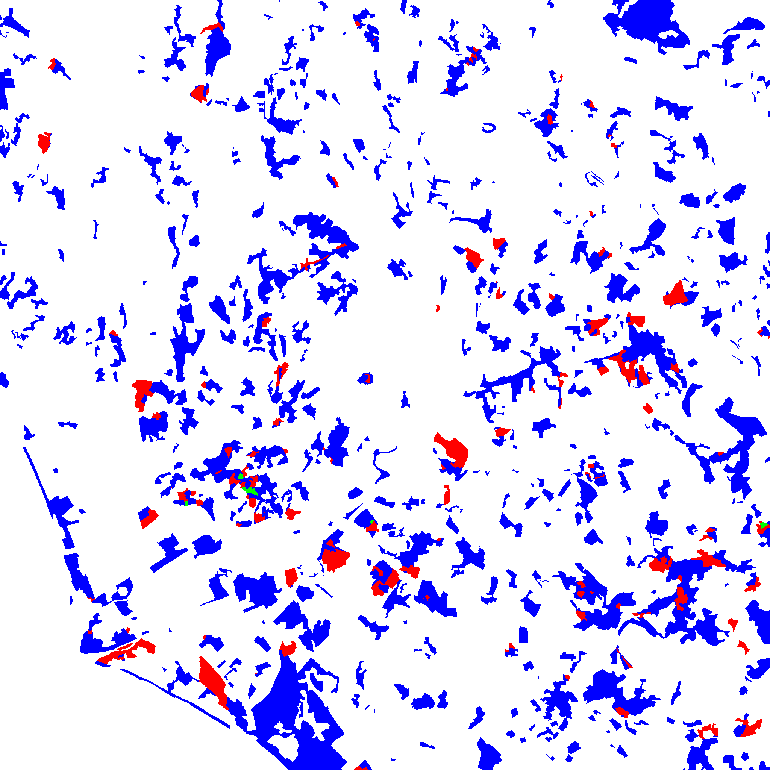
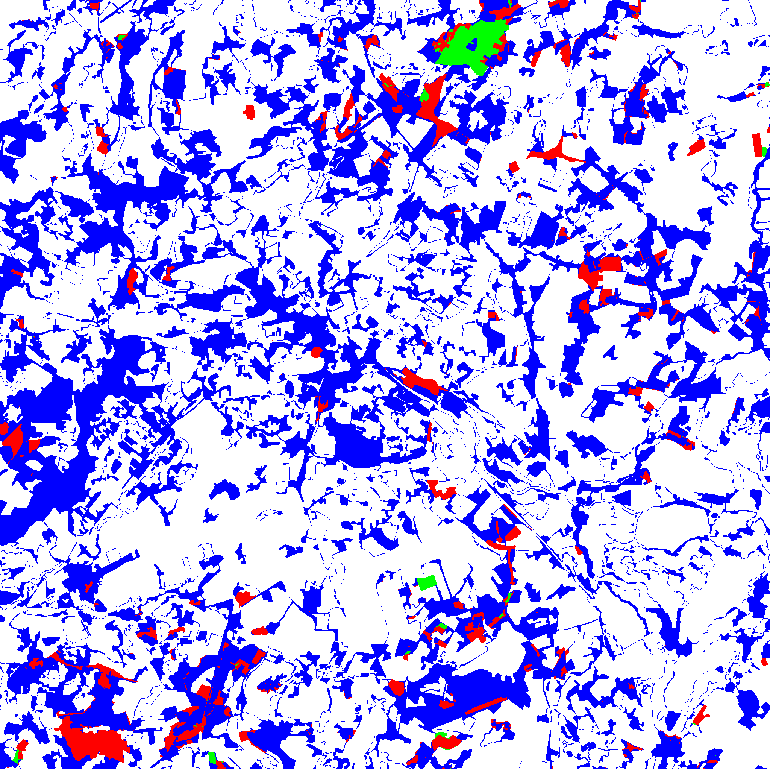
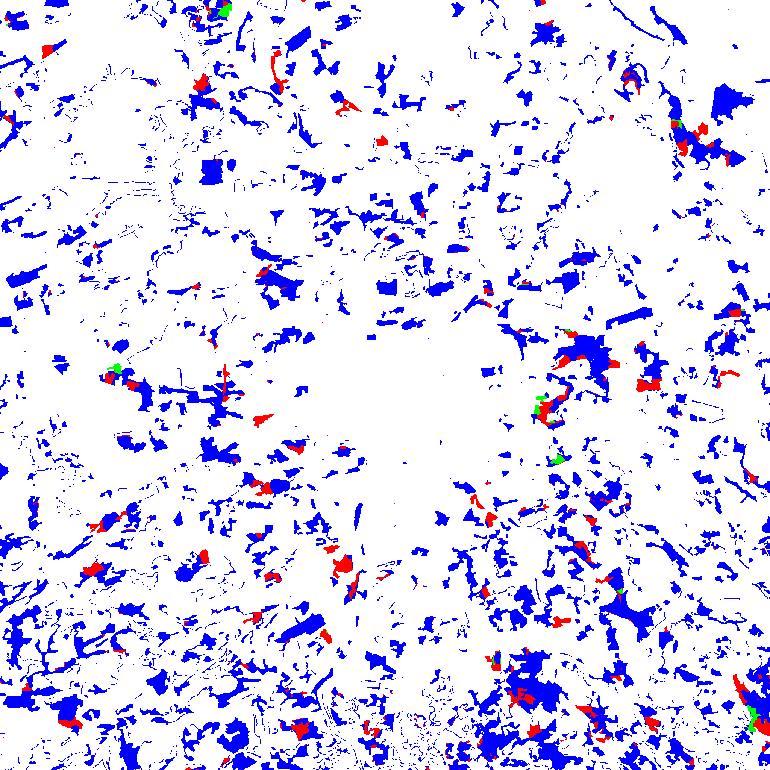

In [24]:
m = LCV.plot_cities_land_use_change_map(
    city_names=list(city_objects.keys()),
    city_objects=city_objects,
    bbox_source={**LUCA.POLSKA_OBSZARY_BBOX,**LUCA.EUROPA_OBSZARY_BBOX},
    years=[1990, 2000, 2006, 2012, 2018],
    class_column="class_lvl_3",
    min_changes=1,
    cmap_name="brg"
)
m

<h4>🧠 Wnioski </h4>
<b> Poziom 1 - główne klasy użytkowania terenu </b> <br>
Analizując mapę zmian dla poziomu 1, obejmującego jedynie główne kategorie użytkowania terenu, można zauważyć kilka charakterystycznych wzorców przestrzennych:
<ul>
<li>Miasta nadmorskie, takie jak Barcelona, Gdańsk czy okolice Rzymu, wykazują zmiany zlokalizowane głównie na obrzeżach. Może to sugerować przesunięcia linii brzegowej lub inne przekształcenia terenów nadmorskich. Podobne zjawiska obserwuje się również wzdłuż rzek i jezior, np. w okolicach Wisły w Warszawie czy zbiorników wodnych w Berlinie.</li>
<li>Często zaznaczone są także ciągi komunikacyjne — możliwe, że dotyczą one budowy lub rozbudowy infrastruktury drogowej w analizowanym okresie.</li>
<li>Centralne obszary miast pozostają zazwyczaj stabilne — szczególnie widoczne jest to w przypadku Berlina i Pragi, gdzie zmiany w śródmieściu są niemal niezauważalne.</li>
<li>Miastem o najmniejszej liczbie zmian wydaje się być Rzym, natomiast Warszawa wyróżnia się wyraźną intensywnością transformacji.</li>
<li>Głównie w danych występowała tylko jedna transformacja terenu, czasem dwie.</li>
<li>Barcelona odznacza się największą liczbą podwójnych transformacji, natomiast Berlin posiada jedno duże, wyraźne skupisko obszaru, który przeszedł dwie zmiany klasyfikacji w analizowanym okresie.</li>
</ul>

<b> Poziom 2 -  średnia szczegółowość </b> <br>
Na poziomie 2, gdzie uwzględniane są bardziej szczegółowe typy użytkowania terenu (np. podział na grunty orne, pastwiska, zabudowę przemysłową czy zieleń miejską), zauważyć można znacznie większą intensywność i różnorodność transformacji:
<ul>
<li>Transformacje jednokrotne dominują we wszystkich analizowanych miastach, ale transformacje podwójne i potrójne są również powszechne. Pojedyncze lokalizacje wykazują nawet czterokrotne przekształcenia, co świadczy o dużej dynamice zmian.</li>
<li>Barcelona wyróżnia się szczególnie wysoką liczbą transformacji. Stabilne obszary ograniczają się właściwie do centrum miasta oraz dużego, chronionego kompleksu przyrodniczego Parc Natural de Collserola.</li>
<li>Rzym i Praga prezentują się jako miasta z najmniejszą liczbą zmian. W obu przypadkach przekształcenia dotyczą lokalnych, rozproszonych obszarów, raczej niewielkich rozmiarów.</li>
<li>W Berlinie transformacji jest stosunkowo dużo — często tworzą one ciągłe struktury, mogące wskazywać np. na rozwój dróg wraz z przyległą zabudową. Znajduje się tam również kilka większych obszarów transformacji, jednak Grunewald i przyległe tereny zielone pozostają niemal nienaruszone.</li>
<li>Białystok charakteryzuje się niską dynamiką zmian, transformacje są rozproszone.</li>
<li>Warszawa wykazuje wysoką intensywność transformacji — szczególnie widoczne są zmiany na północnych obrzeżach, głównie wzdłuż rzecznych terenów Wisły.</li>
<li>Gdańsk cechują dynamiczne zmiany w pasie od Wzgórza Mickiewicza do Otomina — może to sugerować rozbudowę miasta w kierunku południowym.</li>
</ul>

<b> Poziom 3 -  najwyższa szczegółowość </b> <br>
Na poziomie 3, gdzie klasy użytkowania terenu są najbardziej szczegółowe (np. rozróżnienie między lasem liściastym, iglastym, a mieszanym, czy różne typy zabudowy), obraz zmian staje się jeszcze bardziej dynamiczny i złożony:
<ul>
<li>Rzym i Praga nadal pozostają najstabilniejszymi miastami w zestawieniu – liczba zmian jest tam relatywnie niewielka i ogranicza się do mniejszych, lokalnych obszarów.</li>
<li>Barcelona niemal w całości pokryta jest transformacjami – przeważają zmiany pojedyncze, jednak na mapie pojawiają się też duże skupiska transformacji podwójnych, co świadczy o intensywnej reorganizacji przestrzeni miejskiej w czasie.</li>
<li>W Berlinie zwraca uwagę duży obszar poza ścisłym miastem – na poziomie 2 wykazywał dwie transformacje, a tutaj aż cztery. Leży on na północno-wschodnich obrzeżach Berlina, w sąsiedztwie Panketal. W samym centrum Berlina transformacje są bardziej zagęszczone, natomiast stabilność wykazują osiedla mieszkaniowe położone bardziej peryferyjnie, szczególnie na południu.</li>
<li>W miastach polskich (Warszawa, Gdańsk, Białystok, Rzeszów) obraz zmian bardzo przypomina ten z poziomu 2 – nie widać znacznie większej liczby transformacji, co może sugerować, że wiele zmian następuje w granicach jednej klasy szczegółowej (np. między różnymi typami terenów rolniczych lub leśnych).</li>
</ul>

<h2> FAZA 2 – Analiza szczegółowa (3 wybrane miasta) </h2>

Postanowiono wybrać trzy miasta, których szczegółowej analizy dokonano w dalszej części projektu. Są to: Białystok, jako spokojniejsze pod kątem transformacji miasto polskie, Warszawa, dynamiczniej rozwijające się polskie miasto, ciekawe transformacje przy brzegach rzeki, oraz Berlin - dosyć dynamiczne miasto spoza Polski.

<h4> 🗺️ Mapa użytkowania terenu – rok po roku </h4>

<b> 🗺️ Obszar: Białystok</b> <br>

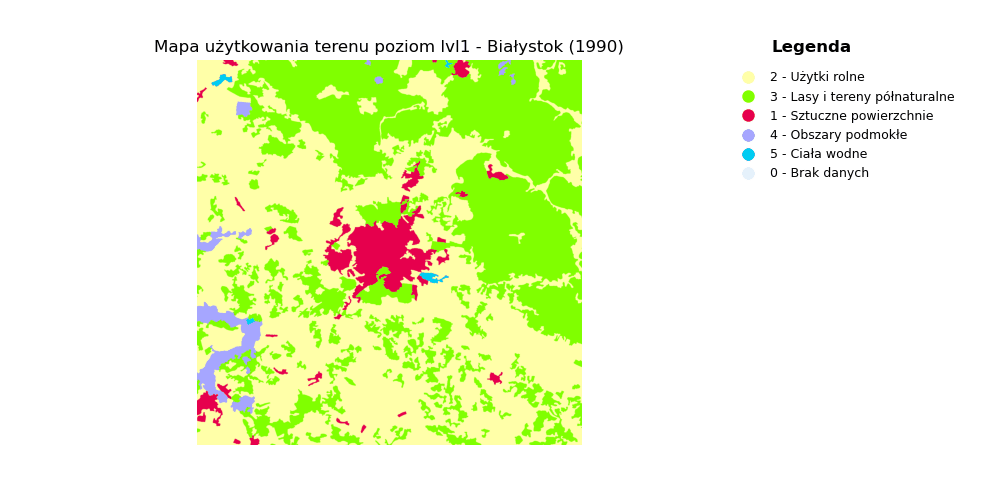

In [17]:
LCV.MapAnimationByYears(Bialystok.images_lvl_1, Bialystok.unique_categories_lvl_1_per_year, Bialystok.area_name, "lvl1")

✅ Poziom 1 – ogólny (klasy podstawowe)<br>
<li>Zaobserwowano znaczny wzrost powierzchni sztucznych, czyli m.in. terenów zabudowanych, infrastruktury drogowej, powierzchni przemysłowych czy usługowych.
Wzrost ten najprawdopodobniej związany jest z rozwojem urbanizacji i ekspansją miasta.
<li>Część terenów podmokłych uległa transformacji w ciała wodne — co może wynikać z działań hydrotechnicznych, regulacji cieków wodnych lub zmiany stosunków wodnych w regionie. W południowo zachodzniej części mapki widać też dynamiczne zmiany: tereny podmokłe powiększały się i zmniejszały na przestrzeni lat.
<li>Od roku 2012 pojawia się wydłużony, prostoliniowy obszar sztucznej powierzchni. Dotyczy to powstania odcinka drogi ekspresowej s8.
<li>Zauważalny jest również największy spadek w areałach użytków rolnych, co może być efektem przekształceń w tereny miejskie lub rezygnacji z działalności rolniczej. Przemiany te wydająsięnastępowaćgłównie na rzecz sztucznych powierzchni.

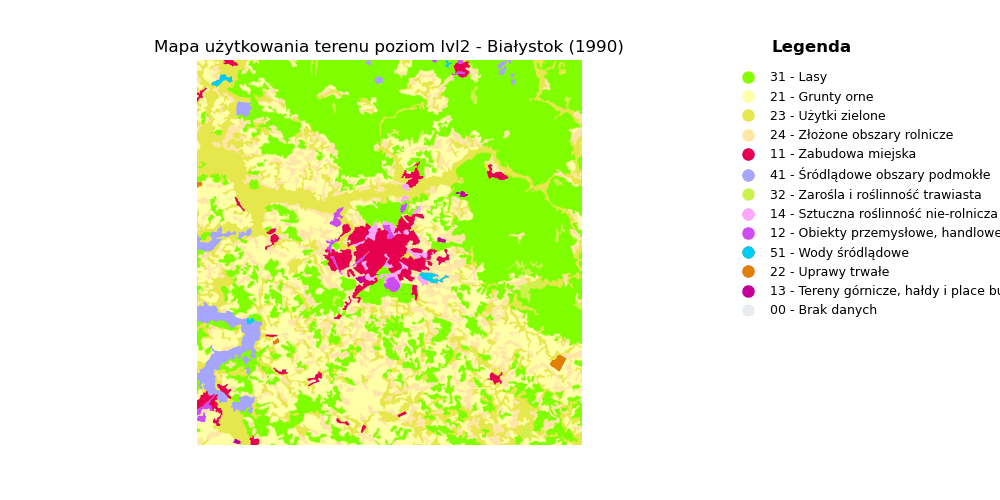

In [18]:
LCV.MapAnimationByYears(Bialystok.images_lvl_2, Bialystok.unique_categories_lvl_2_per_year, Bialystok.area_name, "lvl2")

✅Poziom 2 – średnia szczegółowość
<li>Na tym poziomie widać wyraźny wzrost zabudowy miejskiej, a także ekspansję obiektów przemysłowych i handlowych.
<li>Z czasem na mapie zaczynają się pojawiać obiekty klasy: Tereny górcznicze, hałdy i place budowy.
<li>Duża część lasów ulega transformacji - w użytki zielone albo zarośla i roślinność trawiastą.

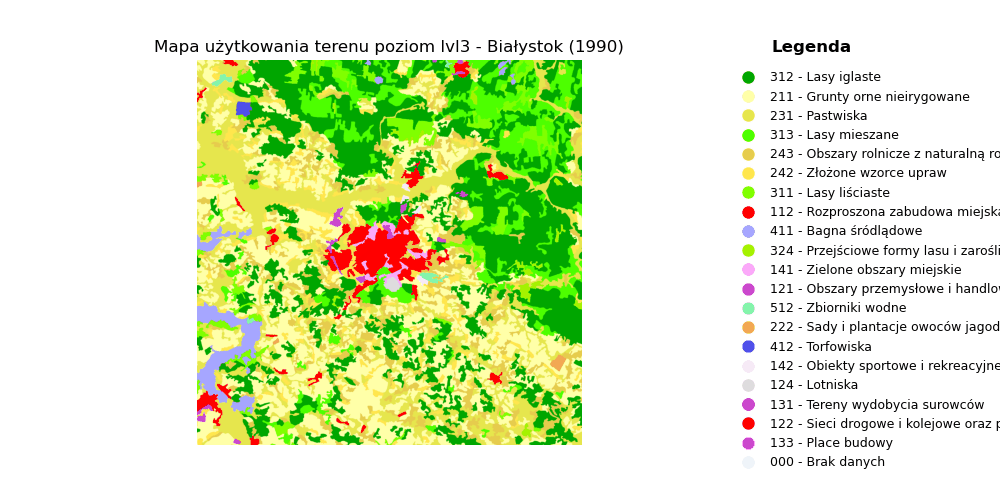

In [19]:
LCV.MapAnimationByYears(Bialystok.images_lvl_3, Bialystok.unique_categories_lvl_3_per_year, Bialystok.area_name, "lvl3")

✅ Poziom 3 – szczegółowy (np. rodzaj drzewostanu)
<li>Analiza najdokładniejsza ujawnia zmiany w strukturze terenów leśnych — przesunięcia pomiędzy lasami liściastymi a mieszanymi.
<li>Mimo że zmieniły się proporcje typów lasów, całkowita powierzchnia terenów leśnych pozostała stosunkowo stabilna.
<li>Zauważony wcześniej zbiornik wodny na północy był do 2000 roku torfowiskiem.


<b> 🗺️ Obszar: Warszawa</b> <br>

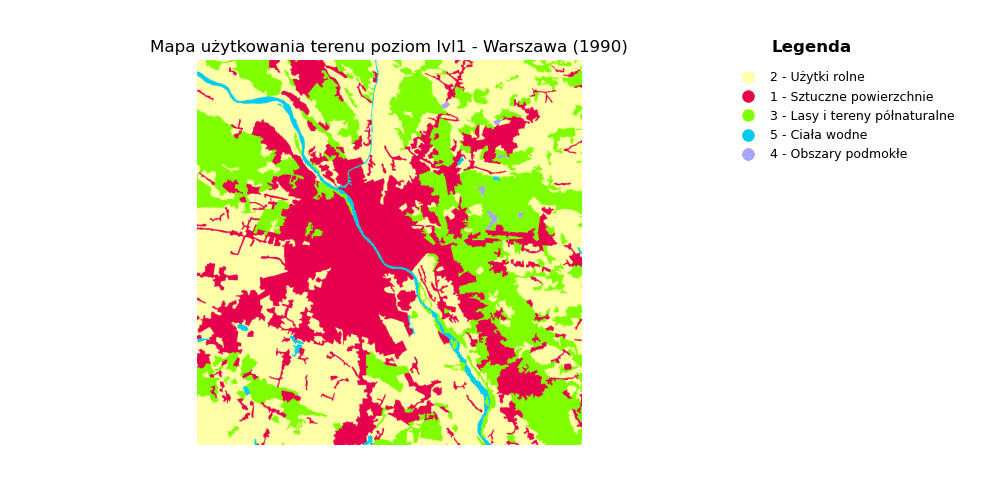

In [26]:
LCV.MapAnimationByYears(Warszawa.images_lvl_1, Warszawa.unique_categories_lvl_1_per_year, Warszawa.area_name, "lvl1")

✅ Poziom 1 – ogólny (klasy podstawowe)<br>

<h4> 📊 Udział klas w czasie </h4>

<b>📊 Obszar: Białystok</b> <br>

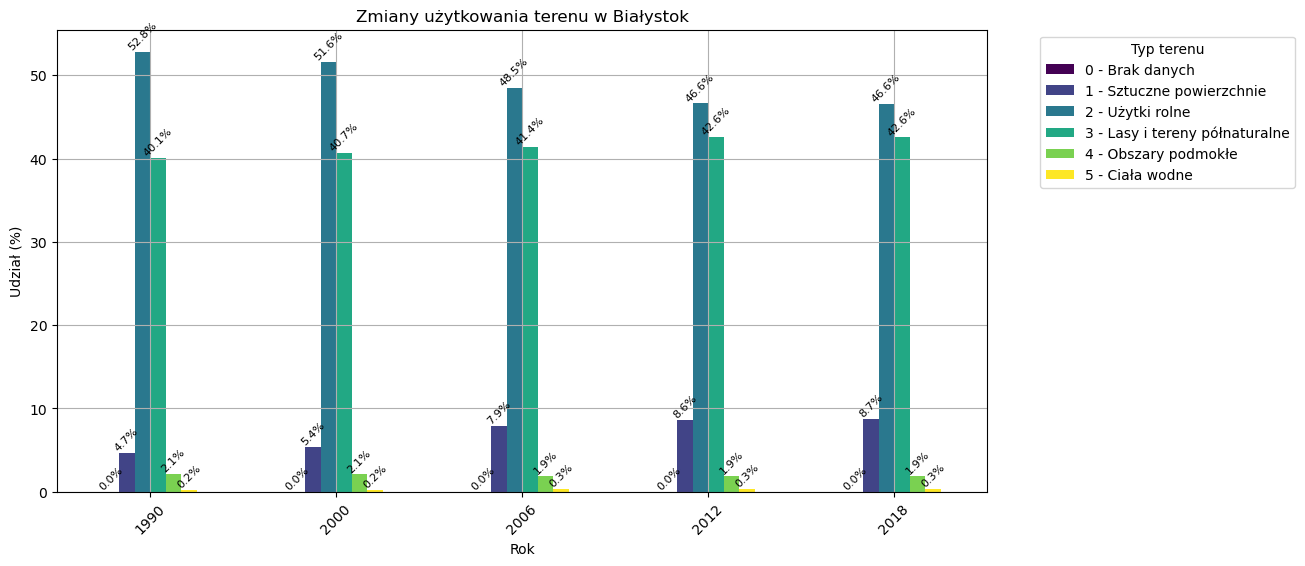

In [20]:
trend_lvl1 = LCV.calculate_land_use_trend(Bialystok.class_lvl_1_percentage_per_year, area_name=Bialystok.area_name,show_percent=True)

<b>1. Systematyczny spadek użytków rolnych (klasa 2)</b>
W 1990 roku użytki rolne stanowiły ponad 51% powierzchni, a do 2018 roku ich udział zmniejszył się do 46.6%.
To pokazuje wyraźny trend zanikania terenów rolniczych, co może być skutkiem urbanizacji, inwestycji mieszkaniowych i infrastrukturalnych.

<b>2. Wzrost powierzchni sztucznych (klasa 1)</b>
Udział powierzchni sztucznych wzrósł z 4.7% w 1990 r. do 8.7% w 2018 r.
To sugeruje intensywny rozwój urbanistyczny – rozbudowa infrastruktury drogowej, mieszkaniowej i przemysłowej.

<b>3. Stabilność terenów leśnych i półnaturalnych (klasa 3)</b>
Udział tych terenów oscyluje w granicach 40.1%–42.6% przez cały okres.
Choć może zachodzić rotacja między typami lasów, łączna powierzchnia pozostaje stosunkowo stała.

<b>4. Nieznaczny wzrost wód powierzchniowych (klasa 5)</b>
Wzrost z 0.2% do 0.3%, co może wynikać z przekształceń terenów podmokłych lub naturalnych zmian hydrologicznych.

<b>5. Spadek terenów podmokłych (klasa 4) </b>
Udział spadł z 2.1% do 1.9%, co może wskazywać na osuszanie lub przekształcanie mokradeł w inne formy użytkowania. W tym wypadku w większości zamienione na ciała wodne.

<h4>🧱 Zmienność wysp (spójnych obszarów) </h4>

<b>🧱 Obszar: Białystok</b> <br>

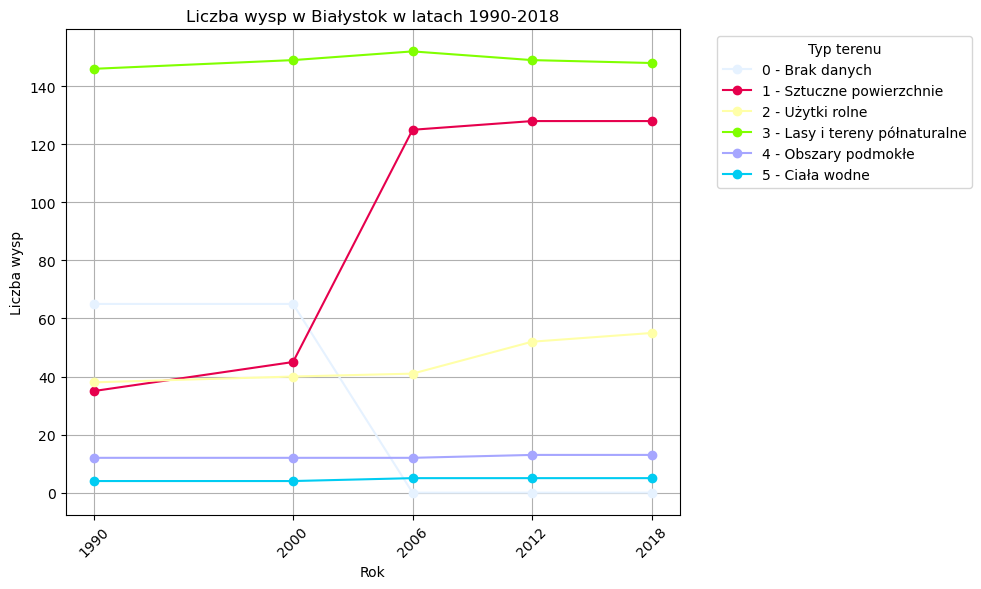

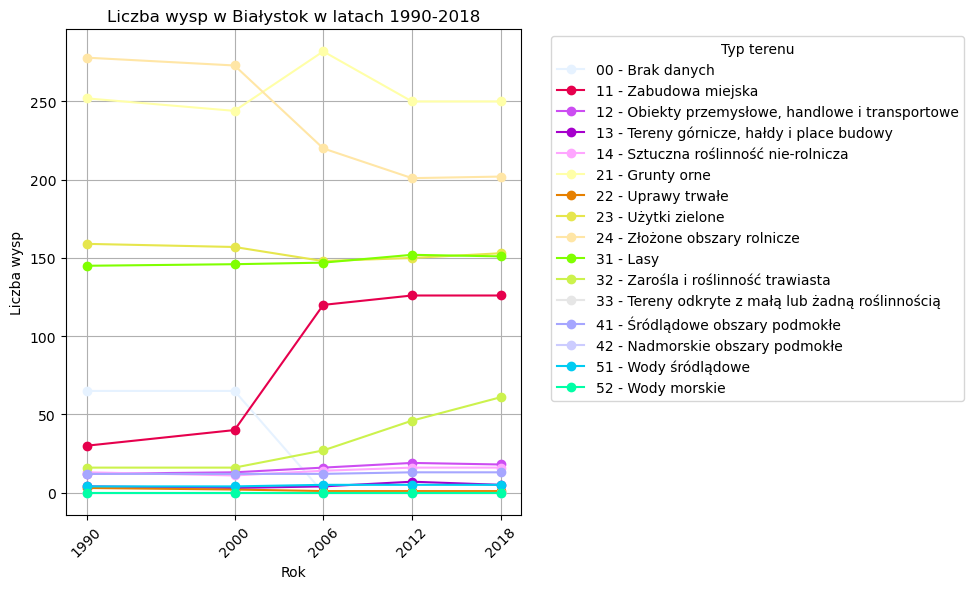

In [21]:
years = [1990,2000,2006,2012,2018]
df_islands_1 = LCV.seperate_classes(LUCA.level_1_legend_desc.values(), years, Bialystok.dfs,"class_lvl_1",Bialystok.area_name,LUCA.level_1_legend)
df_islands_2= LCV.seperate_classes(LUCA.level_2_legend_desc.values(), years, Bialystok.dfs,"class_lvl_2",Bialystok.area_name,LUCA.level_2_legend)

<li> Między rokiem 2000 a 2006 nastąpił gwałtowny wzrost liczby wysp dla sztucznych powierzchni. Na wykresie dla wyższego poziomu szczegółowości widać, że to głównie za sprawą zabudowy miejskiej. Taki rozrost może świadczyć o intensywnym rozproszeniu urbanizacji – powstawaniu nowych osiedli, osad lub budynków w oddzielonych przestrzennie lokalizacjach, co często jest charakterystyczne dla szybkiego, nieliniowego rozwoju przestrzennego miast.
<li> Od 2006 roku widać nieznaczny wzrost w liczbie wysp dla użytków rolnych. Może to sugerować fragmentację i rozdrobnienie terenów rolniczych, np. poprzez rozparcelowanie gruntów czy przekształcenia w inne formy użytkowania. Jest to ciekawe zwłaszcza biorąc pod uwagę, że widać spadek w ilości wysp dla złożonych obszarów roliczych i użytków zielonych.
<li> Lasy i tereny półnaturalne zachowują względną stabilność pod względem liczby skupisk, co może oznaczać, że duże kompleksy leśne nie ulegają intensywnemu rozdrobnieniu. Jednak widać stopniowy wzrost liczby wysp roślinności trawiastej i zarośli, co może być wynikiem zarastania dawnych terenów otwartych, opuszczenia użytków rolnych lub naturalnej sukcesji ekologicznej.

<h2> FAZA 3 – Analiza transformacji (3 wybrane miasta) </h2>

Dla wybranych wcześniej miast dokonano analizy transformacji klas w czasie. Już wiadomo jak zmieniał się teren na przestrzeni lat, jakich obszarów ubywało, a jakich przybywało i czy się one separowały. Teraz można postarać się zrozumieć kierunek zmian - co przeszło w co?

<h4> 🔁 Mapa zmian między latami </h4>

<b> 🔁 Obszar: Białystok</b> <br>

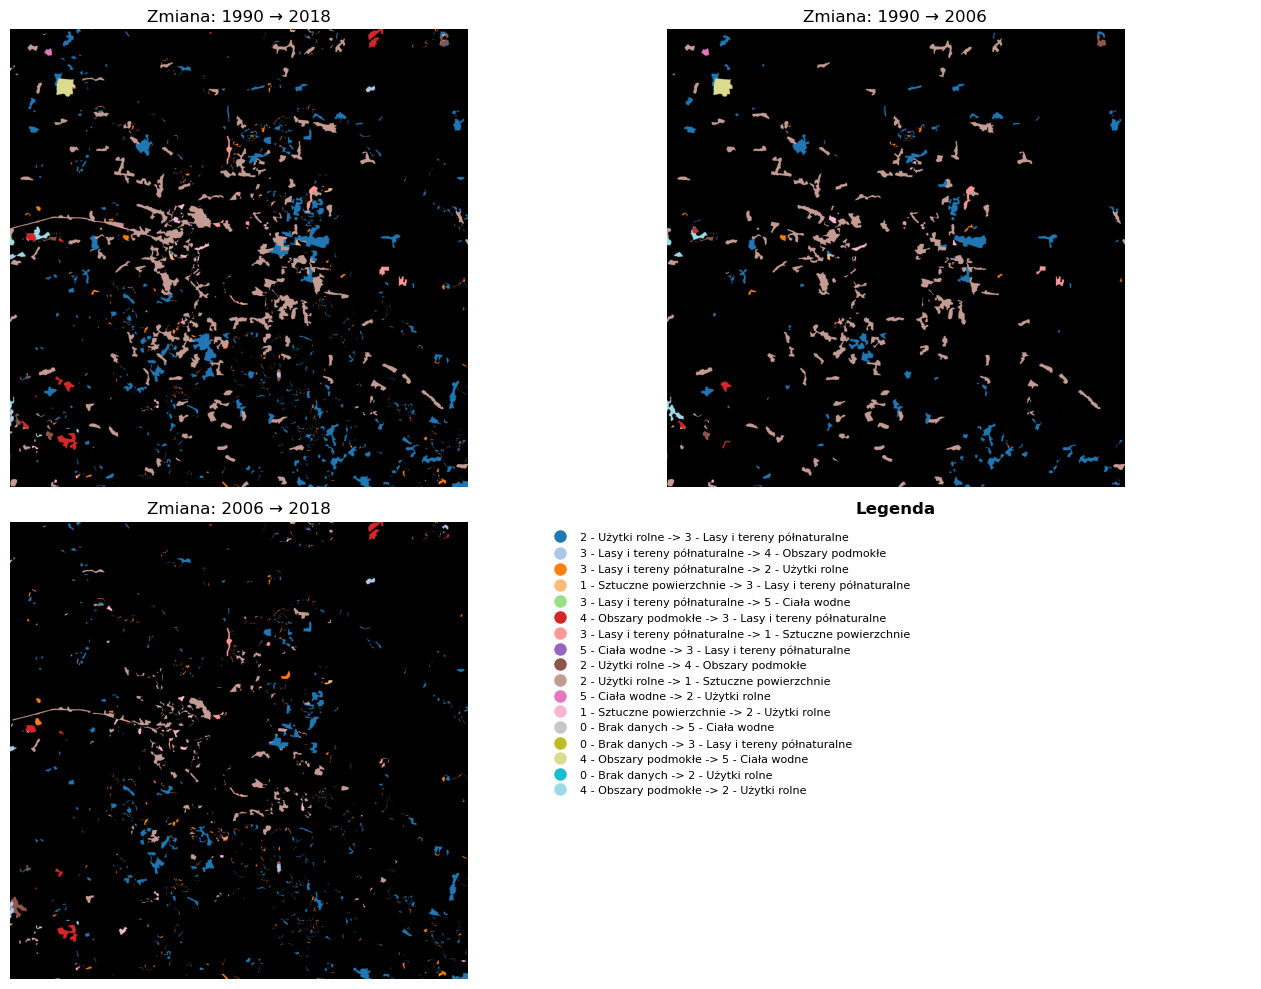

In [22]:
LCV.plot_land_use_change_map(dfs=Bialystok.dfs, years=[1990, 2006, 2018], class_column="class_lvl_1", cmap_name="tab20")

<li> Dominującymi transformacjami są użytki rolne przechodzące w sztuczne powierzchnie oraz użytki rolne przechodzące w lasy i tereny półnaturalne. Może to odzwierciedlać zarówno rozrost miast, jak i rezygnację z działalności rolniczej na mniej opłacalnych terenach.
<li> W okresie 1990–2006 dominują transformacje dużych, zwartch powierzchni, głównie konwersje użytków rolnych w tereny zabudowane. Takie zmiany wskazują na intensywną ekspansję przestrzenną miast i realizację dużych inwestycji infrastrukturalnych czy mieszkaniowych.
<li> Po 2006 roku (do 2018) pojawiają się mniejsze, bardziej rozproszone transformacje, co może sugerować dogęszczanie zabudowy, przekształcanie pojedynczych działek, czy zmiany o charakterze punktowym, np. rekultywacja lub naturalizacja terenów zdegradowanych.
<li> Zauważalne są również przekształcenia lasów i terenów półnaturalnych w użytki rolne, zarówno przed 2006 rokiem, jak i później. Może to być efektem rozwoju rolnictwa w określonych regionach, bądź regulacji prawnych umożliwiających wycinkę i przekształcenie terenów zielonych pod uprawy.

<h4> 🌡️ Heatmapa transformacji klas </h4>

<b> 🌡️ Obszar : Białystok </b> <br>

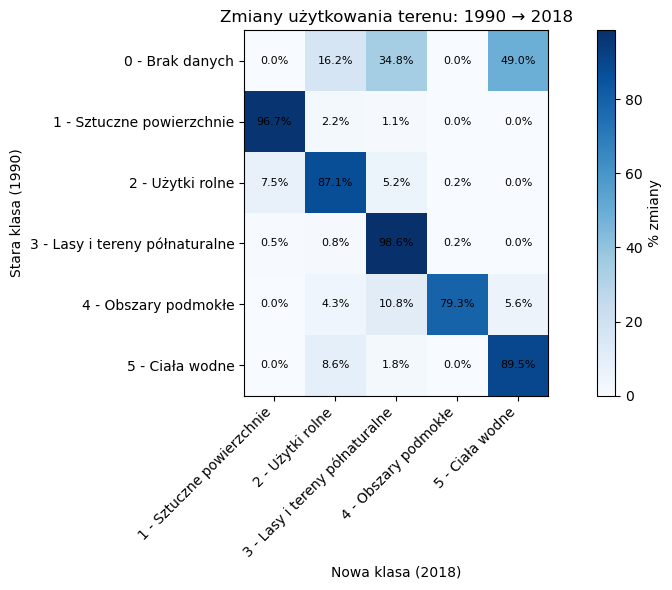

In [23]:
LCV.plot_land_use_change_matrix_matplotlib(dfs=Bialystok.dfs, year_from=1990, year_to=2018, class_column='class_lvl_1')

<li> Najbardziej stabilnymi kategoriami pokrycia terenu okazały się sztuczne powierzchnie oraz lasy i tereny półnaturalne – w przeważającej większości przypadków zachowały swój charakter na przestrzeni lat. Wskazuje to na utrwalenie funkcji urbanistycznych oraz dużą odporność lasów na przekształcenia, być może ze względu na ochronę lub niską presję inwestycyjną.
<li> Tereny podmokłe wykazały najwyższy poziom transformacji, co może być związane z ich osuszaniem, zmianami hydrologicznymi lub ekspansją rolnictwa i leśnictwa. Najczęściej przekształcano je w lasy i tereny półnaturalne, ale również w użytki rolne.
<li> Duża część użytków rolnych została przekształcona w sztuczne powierzchnie oraz w lasy i tereny półnaturalne.
<li> Ciała wodne wykazały pewne zmiany – aż 8,6% z nich przeszło w użytki rolne. To stosunkowo duża wartość.

<h2> Wnioski </h2>

<b> Białystok </b> <br>

<li> Ekspancja miejska jest widoczna dla Białegostoku głównie od roku 2006.
<li> Po 2006 roku nastąpił nieznaczny wzrost liczby wysp użytków rolnych, ale też widać że sporo tych terenów przeszło w sztuczne powierzchnie i lasy i tereny półnaturalne. Może to wskazywać na postępujące rozdrobnienie rolnictwa lub jego przenikanie na obrzeża miasta.
<li> Ciekawe były transformacje terenów podmokłych - wygląda na to, że były one na przestrzeni lat osuszane, a czasem ten sam teren został osuszony i ponownie stał się podmokły. 